<a href="https://colab.research.google.com/github/youngeun1207/keras/blob/main/SHL/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
train_data = np.load('/content/drive/MyDrive/SHLdatasets/train_data_5sec2.npy')
train_label = np.load('/content/drive/MyDrive/SHLdatasets/train_label_5sec2.npy')

val_data = np.load('/content/drive/MyDrive/SHLdatasets/val_data_5sec2.npy')
val_label= np.load('/content/drive/MyDrive/SHLdatasets/val_label_5sec2.npy')

In [2]:
print(train_data.shape)
print(train_label.shape)
print(val_data.shape)
print(val_label.shape)

(39640, 500, 17)
(39640, 9)
(20454, 500, 17)
(20454, 9)


In [2]:
train_data = np.nan_to_num(train_data)
val_data = np.nan_to_num(val_data)

In [ ]:
from keras import regularizers
# from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.LSTM(32, input_shape=(500, 17), return_sequences=True))
model.add(layers.LSTM(32))
# ,kernel_regularizer=regularizers.l2(0.001) , recurrent_dropout = 0.5, return_sequences=True
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(train_data,
                     train_label,
                     epochs=20,
                     batch_size=256,
                     validation_data = (val_data, val_label))

In [ ]:
# 집가서 돌려보기...
from keras import regularizers
from keras.backend import dropout
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
# 64가 마지노선인듯...
model.add(layers.LSTM(64, input_shape=(500, 16), 
                      recurrent_dropout = 0.5, 
                      dropout = 0.1,
                      kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(9, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss= 'categorical_crossentropy',
             metrics= ['accuracy'])
model.summary()

history = model.fit(train_data[:,:,1:],
                    train_label,
                    epochs=25,
                    batch_size=2048,
                    validation_data = (val_data[:,:,1:], val_label))

In [8]:
model.evaluate(val_data[:,:,1:], val_label)

640/640 [==============================] - 6s 9ms/step - loss: 2.5428 - accuracy: 0.2806


[2.542794942855835, 0.2806296944618225]

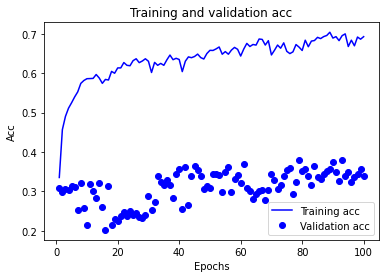

In [7]:
# l2규제(0.001) + dropout(0.1), acc = 0.31
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

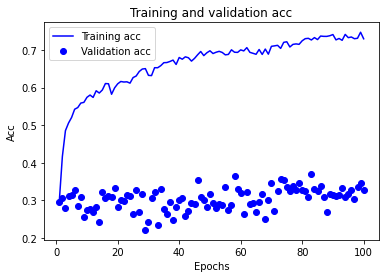

In [10]:
# l2규제(0.001), acc = 0.34
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'bo', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()